In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,accuracy_score,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier

In [245]:
heart=pd.read_csv(r"C:\Users\Emiana Emmanuel\Downloads\heart.csv")
heart.sample(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
262,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
116,41,1,2,130,214,0,0,168,0,2.0,1,0,2,1
233,64,1,0,120,246,0,0,96,1,2.2,0,1,2,0
208,49,1,2,120,188,0,1,139,0,2.0,1,3,3,0
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2,1


In [246]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [247]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [248]:
heart_failure = heart['output']==1
print(heart_failure.value_counts())
print('percentage of heart failure:',165/303*100,'%')
print('percentage of without heart failure:',138/303*100,'%')

True     165
False    138
Name: output, dtype: int64
percentage of heart failure: 54.45544554455446 %
percentage of without heart failure: 45.54455445544555 %


<AxesSubplot:>

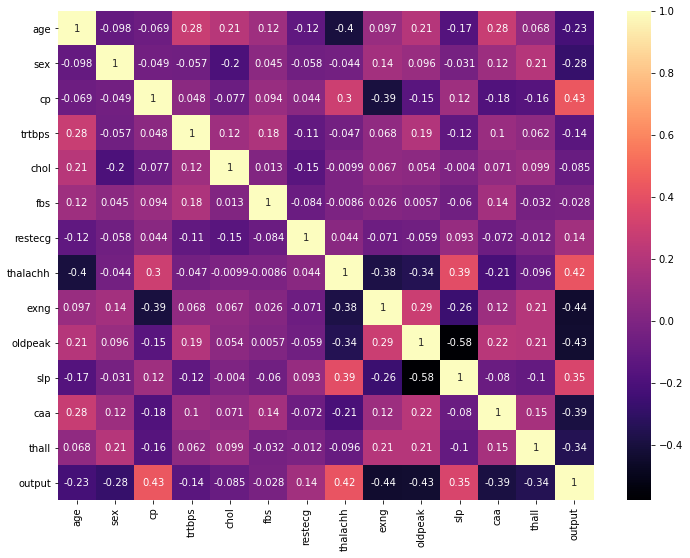

In [249]:
plt.figure(figsize=(12,9))
sns.heatmap(heart.corr(), annot=True, cmap='magma')

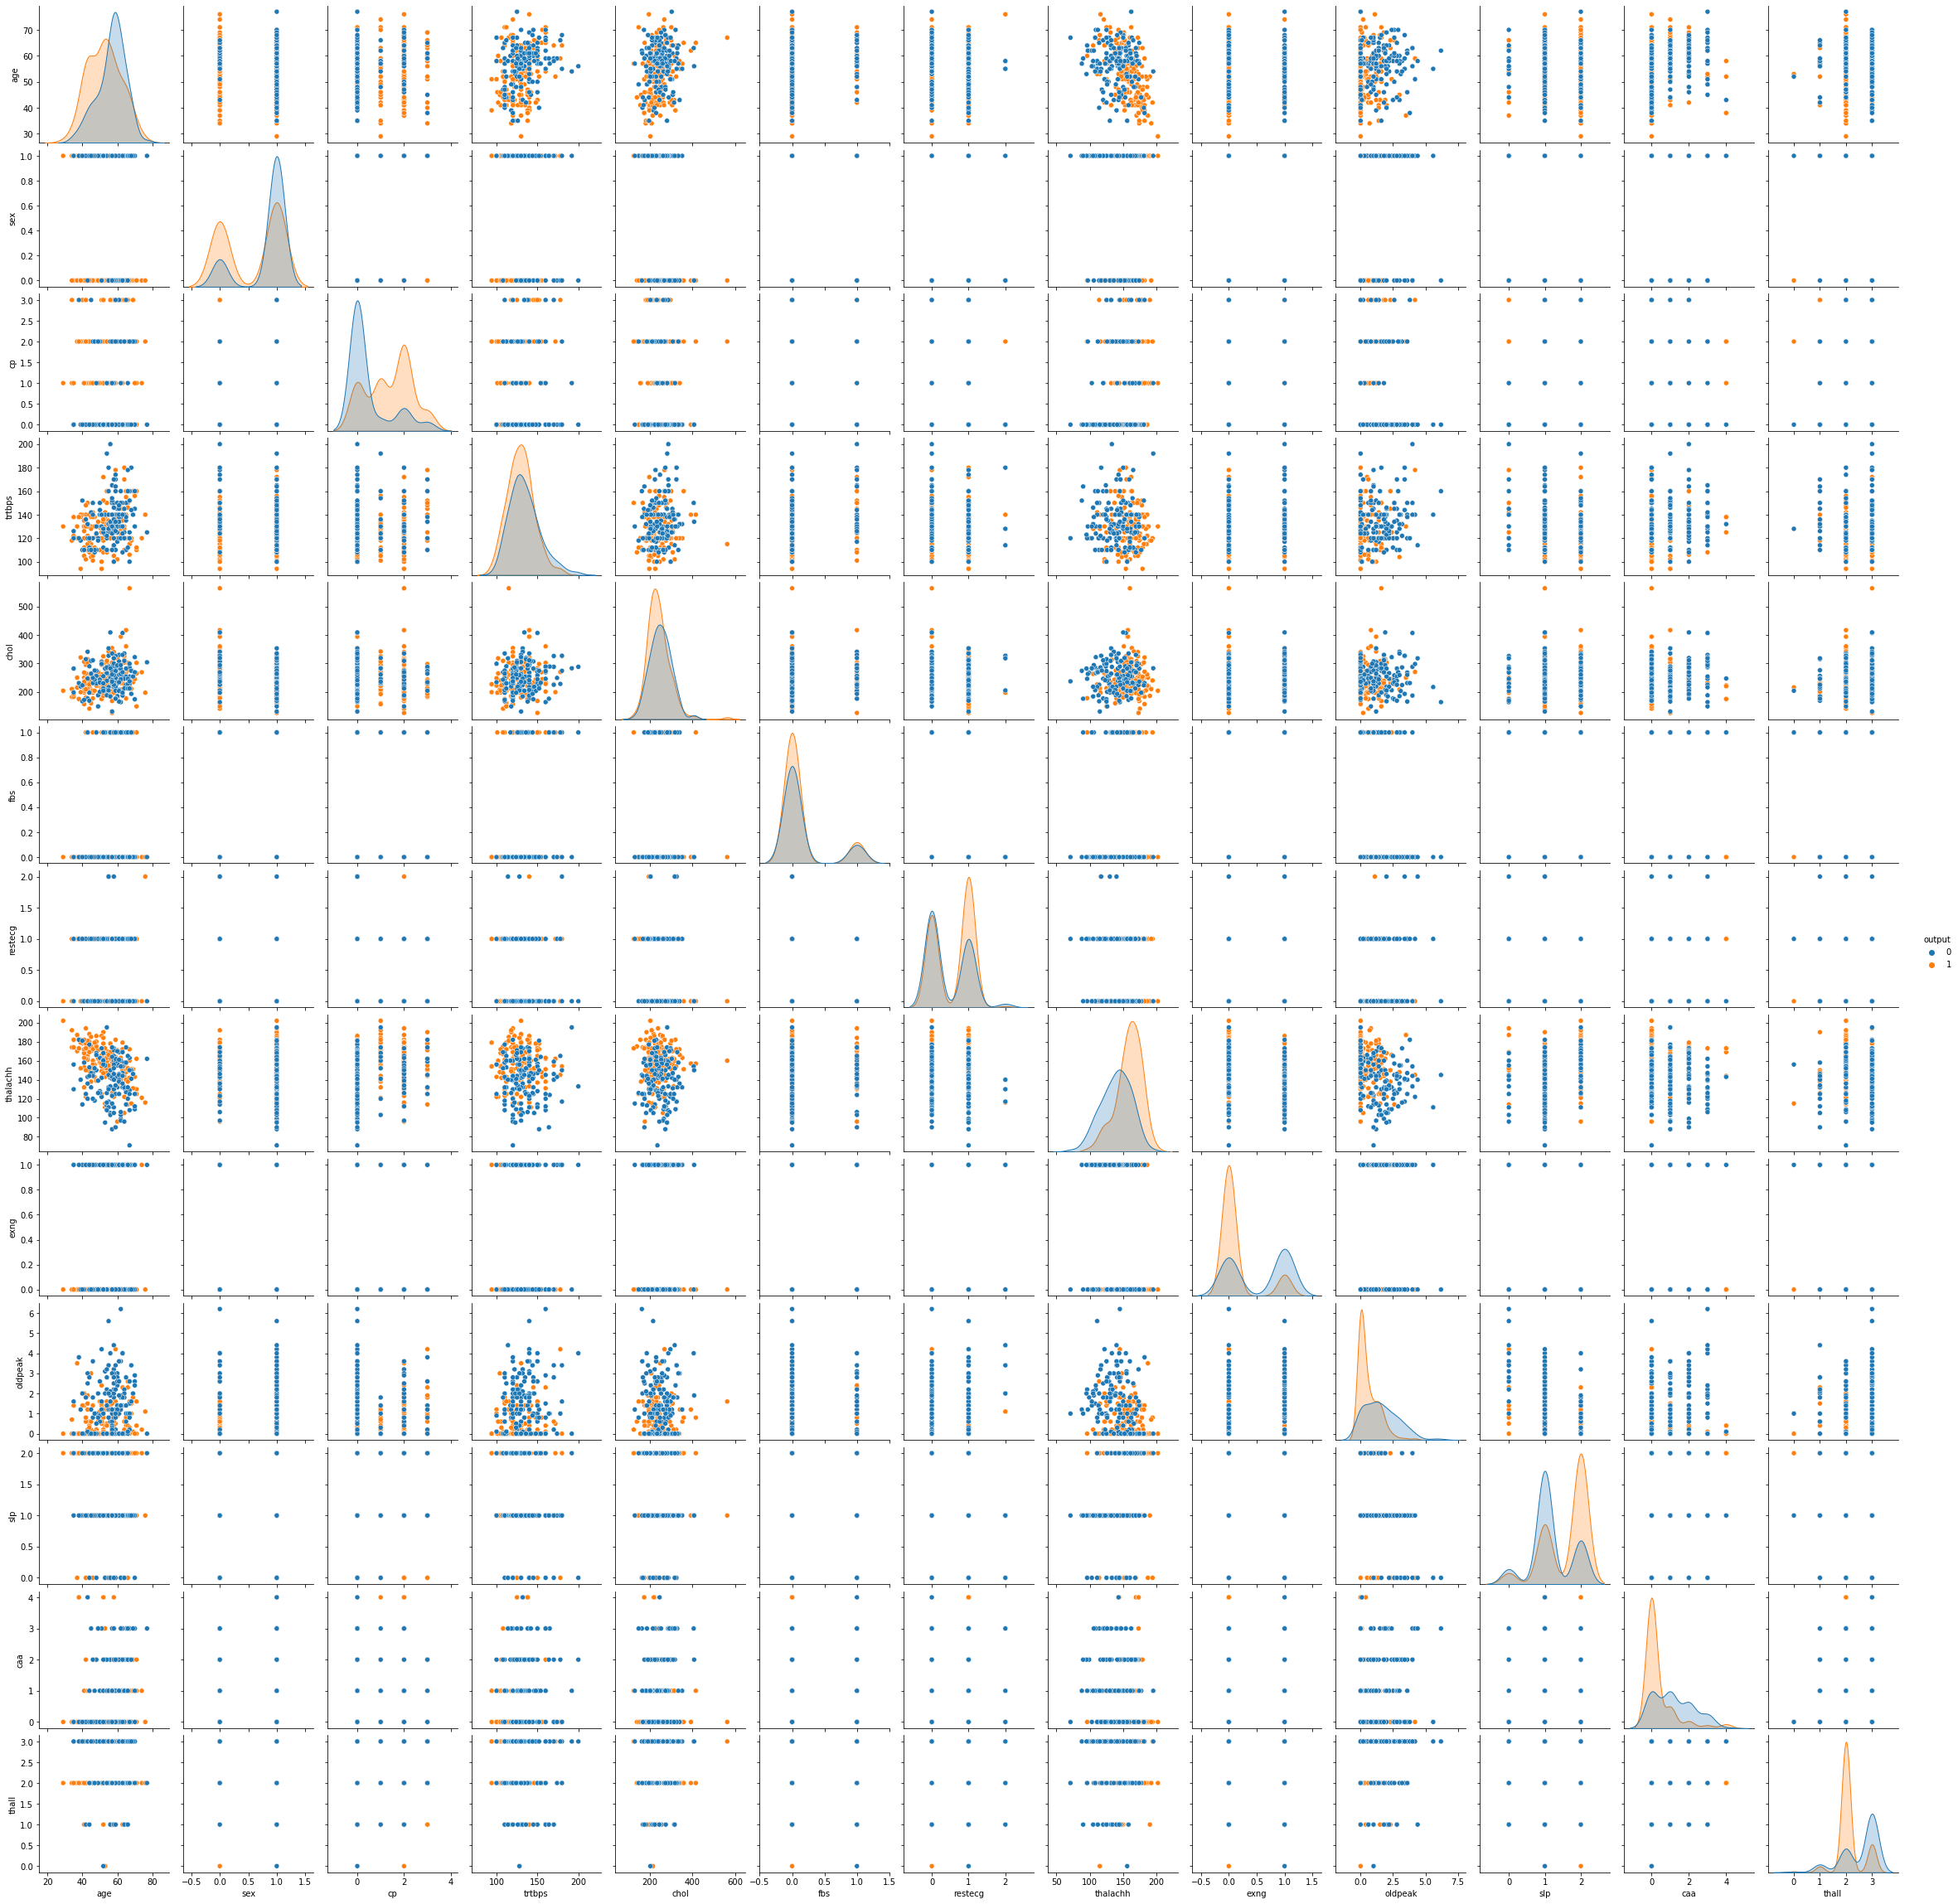

In [250]:
sns.pairplot(heart, hue='output')

In [251]:
print(heart['output'].value_counts()
#heart['output'].value_counts().plot(kind='pie',figsize=(8,8))
#heart['output'].value_counts().plot(kind='bar', figsize=(8,8))

SyntaxError: unexpected EOF while parsing (<ipython-input-251-7c466c33c2c2>, line 3)

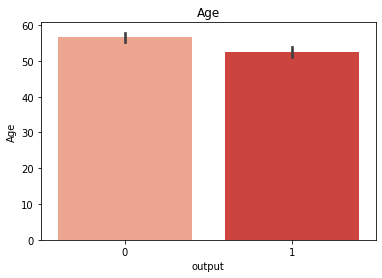

0 = not heart failure 1 = heart failure


In [252]:
sns.barplot(x =heart['output'], y=heart['age'],palette="Reds")
plt.title('Age')
plt.xlabel('output')
plt.ylabel('Age')
plt.show()
print('0 = not heart failure', '1 = heart failure')

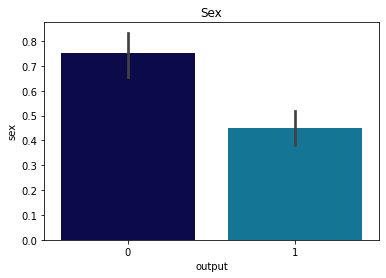

0 = not heart failure 1 = heart failure


In [253]:
sns.barplot(x =heart['sex'], y=heart['output'],palette="ocean")
plt.title('Sex')
plt.xlabel('output')
plt.ylabel('sex')
plt.show()
print('0 = not heart failure', '1 = heart failure')

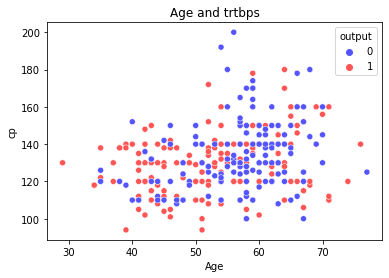

0 = not heart failure 1 = heart failure


In [254]:
sns.scatterplot(x=heart['age'],y=heart['trtbps'], hue=heart['output'], palette='seismic')
plt.xlabel('Age')
plt.ylabel('cp')
plt.title('Age and trtbps')
plt.show()

print('0 = not heart failure', '1 = heart failure')

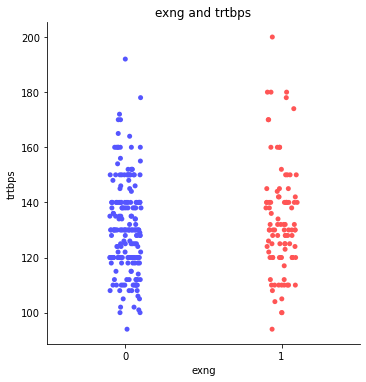

0 = not heart failure 1 = heart failure


In [255]:
sns.catplot(x=heart['exng'],y=heart['trtbps'], data=heart, palette='seismic')
plt.xlabel('exng')
plt.ylabel('trtbps')
plt.title('exng and trtbps')
plt.show()

print('0 = not heart failure', '1 = heart failure')

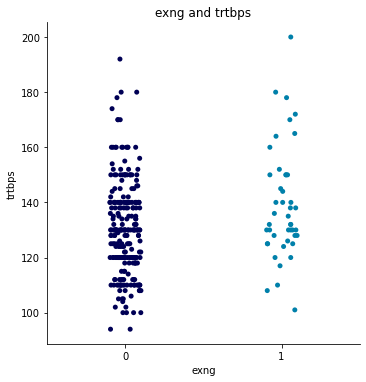

0 = not heart failure 1 = heart failure


In [256]:
sns.catplot(x=heart['fbs'],y=heart['trtbps'], data=heart, palette='ocean')
plt.xlabel('exng')
plt.ylabel('trtbps')
plt.title('exng and trtbps')
plt.show()

print('0 = not heart failure', '1 = heart failure')

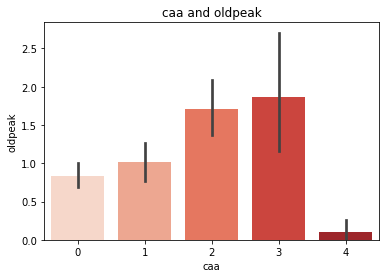

0 = not heart failure 1 = heart failure


In [257]:
sns.barplot(x =heart['caa'], y=heart['oldpeak'],palette="Reds")
plt.title('caa and oldpeak')
plt.xlabel('caa')
plt.ylabel('oldpeak')
plt.show()
print('0 = not heart failure', '1 = heart failure')

<Figure size 1440x864 with 0 Axes>

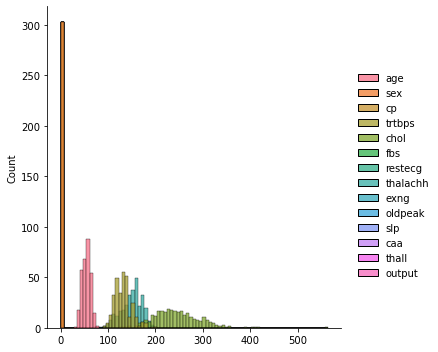

In [258]:
plt.figure(figsize=(20,12))

sns.displot(heart)

In [259]:
data = heart.drop('output', axis='columns')
target = heart.output

In [260]:
x_train,x_test, y_train,y_test = train_test_split(data, target, test_size=0.3, stratify=target)

In [261]:
print('training datasets:',len(x_train))
print('testing datasets:',len(x_test))

training datasets: 212
testing datasets: 91


In [262]:
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)

    prediction = knn.predict(x_test)    
    print('K', i, ':', accuracy_score(y_test, prediction))

K 1 : 0.5384615384615384
K 2 : 0.5494505494505495
K 3 : 0.6153846153846154
K 4 : 0.5934065934065934
K 5 : 0.6263736263736264
K 6 : 0.6153846153846154
K 7 : 0.6593406593406593
K 8 : 0.6043956043956044
K 9 : 0.6263736263736264


In [263]:
KNN = accuracy_score(y_test, prediction)
print('KNN: ', KNN)

KNN:  0.6263736263736264


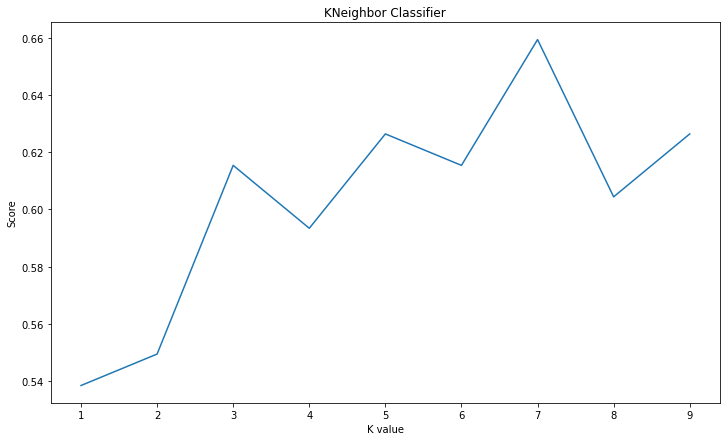

In [264]:
Score = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    prediction = knn.predict(x_test)
    Score.append(accuracy_score(y_test, prediction))

plt.figure(figsize=(12,7))
plt.plot(range(1,10), Score)
plt.xticks(np.arange(1,10,1))
plt.title('KNeighbor Classifier')
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()


<AxesSubplot:>

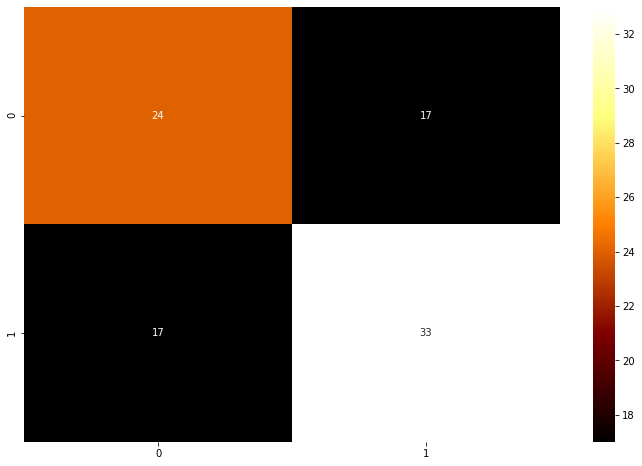

In [265]:
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, cmap='afmhot')

In [266]:
print('classification report /n:',classification_report(y_test, prediction))

classification report /n:               precision    recall  f1-score   support

           0       0.59      0.59      0.59        41
           1       0.66      0.66      0.66        50

    accuracy                           0.63        91
   macro avg       0.62      0.62      0.62        91
weighted avg       0.63      0.63      0.63        91



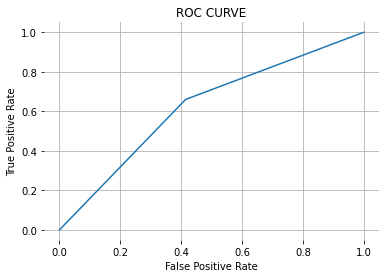

The score ROC Curve is: 62.3%


In [267]:
false_positive_rate, true_positiv_rate, _= roc_curve(y_test, prediction)
auc= roc_auc_score(y_test, prediction)
plt.plot(false_positive_rate, true_positiv_rate, label="auc="+str(auc))
plt.box(False)
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()
 
print(f"The score ROC Curve is: {round(auc,3)*100}%")

In [268]:
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
prediction = tree.predict(x_test)
tree=accuracy_score(y_test, prediction)

In [269]:
y_test[:5]

285    0
228    0
188    0
98     1
63     1
Name: output, dtype: int64

In [270]:
prediction[:5]

array([0, 0, 0, 0, 1], dtype=int64)

<AxesSubplot:>

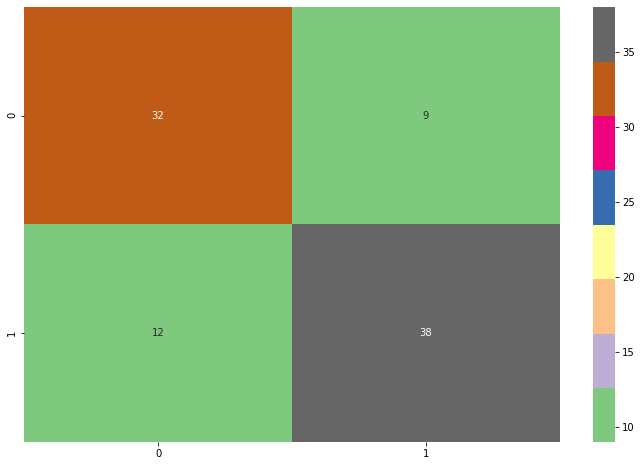

In [271]:
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, cmap='Accent')

In [272]:
print('classification report /n:',classification_report(y_test, prediction))

classification report /n:               precision    recall  f1-score   support

           0       0.73      0.78      0.75        41
           1       0.81      0.76      0.78        50

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



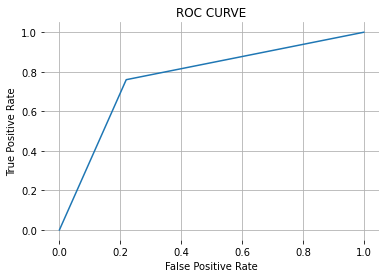

The score ROC Curve is: 77.0%


In [273]:
false_positive_rate, true_positiv_rate, _= roc_curve(y_test, prediction)
auc= roc_auc_score(y_test, prediction)
plt.plot(false_positive_rate, true_positiv_rate, label="auc="+str(auc))
plt.box(False)
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()
 
print(f"The score ROC Curve is: {round(auc,3)*100}%")

In [274]:
random = RandomForestClassifier()
random.fit(x_train,y_train)
prediction = random.predict(x_test)
random = accuracy_score(y_test, prediction)
print('RandomForest: ', random)

RandomForest:  0.8021978021978022


<AxesSubplot:>

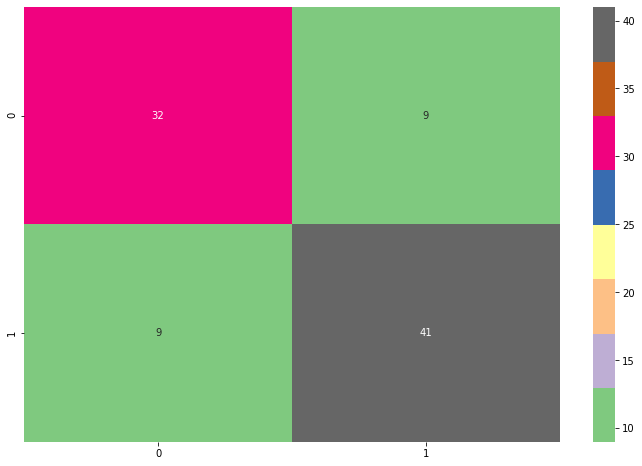

In [275]:
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, cmap='Accent')

In [276]:
print('classification report /n:',classification_report(y_test, prediction))

classification report /n:               precision    recall  f1-score   support

           0       0.78      0.78      0.78        41
           1       0.82      0.82      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



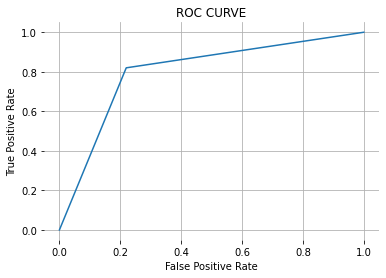

The score ROC Curve is: 80.0%


In [277]:
false_positive_rate, true_positiv_rate, _= roc_curve(y_test, prediction)
auc= roc_auc_score(y_test, prediction)
plt.plot(false_positive_rate, true_positiv_rate, label="auc="+str(auc))
plt.box(False)
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()
 
print(f"The score ROC Curve is: {round(auc,3)*100}%")

In [278]:
Ada = AdaBoostClassifier()
Ada.fit(x_train,y_train)
prediction = Ada.predict(x_test)
Ada = accuracy_score(y_test, prediction)
print('AdaBoost:', Ada)

AdaBoost: 0.8021978021978022


<AxesSubplot:>

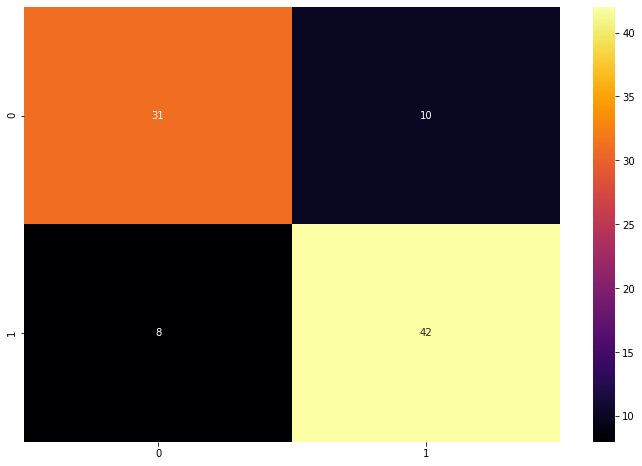

In [279]:
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, cmap='inferno')

In [280]:
print('classification report /n:',classification_report(y_test, prediction))

classification report /n:               precision    recall  f1-score   support

           0       0.79      0.76      0.77        41
           1       0.81      0.84      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



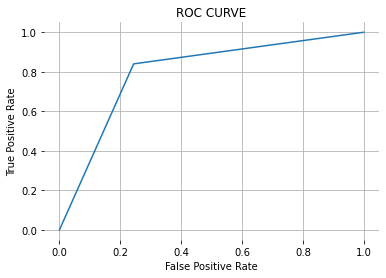

The score ROC Curve is: 79.80000000000001%


In [281]:
false_positive_rate, true_positiv_rate, _= roc_curve(y_test, prediction)
auc= roc_auc_score(y_test, prediction)
plt.plot(false_positive_rate, true_positiv_rate, label="auc="+str(auc))
plt.box(False)
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()
 
print(f"The score ROC Curve is: {round(auc,3)*100}%")

In [282]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
prediction = GBC.predict(x_test)
GBC = accuracy_score(y_test, prediction)
print('GradientBoosting:', GBC)

GradientBoosting: 0.8131868131868132


<AxesSubplot:>

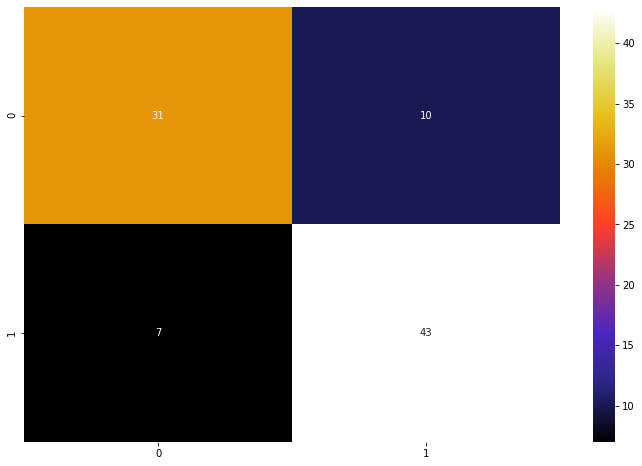

In [283]:
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, cmap='CMRmap')

In [284]:
print('classification report /n:',classification_report(y_test, prediction))

classification report /n:               precision    recall  f1-score   support

           0       0.82      0.76      0.78        41
           1       0.81      0.86      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



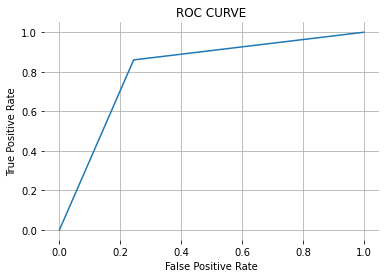

The score ROC Curve is: 80.80000000000001%


In [285]:
false_positive_rate, true_positiv_rate, _= roc_curve(y_test, prediction)
auc= roc_auc_score(y_test, prediction)
plt.plot(false_positive_rate, true_positiv_rate, label="auc="+str(auc))
plt.box(False)
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()
 
print(f"The score ROC Curve is: {round(auc,3)*100}%")

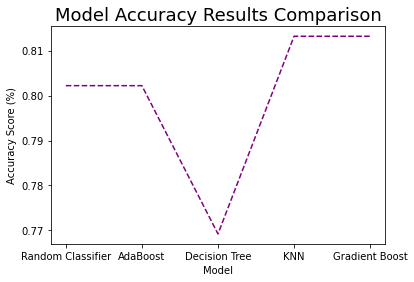

In [286]:
arrX = ['Random Classifier','AdaBoost','Decision Tree','KNN', 'Gradient Boost']
arrY = [random, Ada,tree,GBC, GBC]
plt.plot (arrX, arrY, linestyle='--',color='purple')

plt.title("Model Accuracy Results Comparison", fontsize = 18)
plt.xlabel("Model")
plt.ylabel("Accuracy Score (%)")
plt.show()